# Εργαστηριακή Άσκηση 2

Αρχικά θα εμπνευστούμε από το κομμάτι κώδικα που υπάρχει στα δεδομένα παραδείγματα ώς template. Έτσι το πρώτο μέλημα θα είναι να δημιουργήσουμε την αλυσίδα **mc** (λίγο πιο συνοπτικά χωρίς πολλά σχόλια εδώ...)

In [1]:
import random
random.seed(2016) 
from simple_markov_chain_lib import markov_chain

p = 1/6
init_probs = {0: 1.0} #change from "0:" to "2:" for starting in 3rd state 
markov_table = { 0: {1: 1.}, 1: {1: 2/3, 2: 1/3}, 2: {0: p, 1: 1-p} }

mc = markov_chain(markov_table, init_probs)

Έπειτα εισάγουμε την βιβλιοθηκη statistics και δημιουργούμε μια κατάλληλη συνάρτηση (εδώ την prob_estimate) η οποια δέχεται ως ορίσματα τον αριθμό τον βημάτων (πχ 40 αν μας ενδιαφέρει η κατάσταση $Χ_{40}$), τον αριθμό των επαναλήψεων Ν σε κάθε session και τον αριθμό sessions Ν.

In [2]:
import statistics as stat
import math

def prob_estimate(steps, N, M):
    phats = []  #δημιουργούμε μία λίστα στην οποία θα αποθηκεύουμε τους εκτιμητές
    for i in range(M): #για κάθε monte carlo προσομοίωση Μ
        counter = 0    #μηδενίζουμε πρώτα τον μετρητή
        for j in range(N): #για κάθε Ν
            mc.start()     #αρχικοποιούμε την αλυσίδα
            for k in range(steps):  #για κάθε βήμα
                mc.move()           #κάνουμε ένα βήμα
            if mc.running_state==0: #αν στο τέλος η κατάσταση είναι 0
                counter+=1          #αυξάνουμε τον μετρητή
        phats.append(counter/N)     #τον βάζουμε στη λίστα των εκτιμήσεων
    print(
        """By using N={0} and M={1}, 
the mean of the estimators phat was found {2:.8f} and the variance {3:.8f}""" 
        .format(N, M, stat.mean(phats), stat.variance(phats)))

#### estimation from monte carlo ####
n = 40
prob_estimate(n, 200, 50) 
print(" ")
prob_estimate(n, 20000, 50)   
print(" ")

#### theoretical value ####
a=1/25 
b=24/25 
c=18/25
p_theory = a + b/(3*math.sqrt(2))**n*math.cos(3*math.pi*n/4) + c/(3*math.sqrt(2))**n*math.sin(3*math.pi*n/4)
print("The theoretical value is P[X_{0}=0|X_0=0] = {1: .5f} ".format(n, p_theory))


By using N=200 and M=50, 
the mean of the estimators phat was found 0.03870000 and the variance 0.00019674
 
By using N=20000 and M=50, 
the mean of the estimators phat was found 0.04015200 and the variance 0.00000171
 
The theoretical value is P[X_40=0|X_0=0] =  0.04000 


# Απαντήσεις στις ερωτήσεις

1. Κάθε φορά που εκτελούμε την προσομοίωση οι τιμές αυτές είναι ελαφρά διαφορετικές λόγω της στοχαστικότητας κατα την μετακίνηση από κατάστασησε κατάσταση. Να αναφέρω ότι στην τελευταία εκτέλεση του παραπάνω κελιού, η μέση εκτίμηση για Ν=200 ήταν 0.04070000 με διασπορά 0.00023062 ενώ για Ν=20000 η μέση εκτίμηση ήταν 0.0401960 με διασπορά 0.00000147

2. Η θεωρητική τιμή, η οποία φαίνεται πως υπολογίζεται και στην έξοδο του παραπάνω κελιού, βρέθηκε 0.04000. Για την περίπτωση όπου Ν=200, υπάρχει μία διαφορά 0.0017 (που αντιστοιχεί σε 4.25% σχετικό σφάλμα), ωστόσο η διασπορά η οποία βρέθηκε 0.00019756 αντιστοιχεί σε τυπική απόκλιση 0.014 το οποίο σημαίνει ότι η εκτίμηση είναι σχετικά καλή δεδομένης της και της αβεβαιότητας που υπολογίζουμε. Όπως αναμέναμε, ακόμα καλύτερη εκτίμηση επιτυγχάνουμε με Ν=20000 καθώς η εκτιμώμενη μέση τιμή είναι πολύ πιο κοντά στην θεωρητική.

3. Όπως ήδη αναφέραμε οι διασπορά για Ν=200 είναι 0.00023062 ενώ για Ν=20000 είναι 0.00000147. Άν και όλα τα παραπάνω απότελέσματα εξήχθησαν κατά μια τυχαία εκτέλεση του κώδικα, η τάξεις μεγέθους είναι εμφανές ότι διαφέρουν. Προφανώς στην περίπτωση όπου Ν=20000 η αβεβαιότητα της εκτίμησης, η οποία μπορεί να ταυτιστεί με την διασπορά, είναι αρκετά μικρότερη.

4. Για την απάντηση σε αυτό το ερώτημα αρκεί να ανέβουμε στο πρώτο κελί και να αλλάξουμε την εντολή init_probs={0: 1.0}  σε init_probs={2: 1.0}. Μετά από εκτέλεση όλων των κελιών (μέχρι αυτό το σημείο), παρατηρήθηκε ότι οι δύο εκτιμήσεις δεν αλλάζουν αισθητά. Συγκερκριμένα για μια εκτέλεση του κελιού, για Ν=200 βρέθηκε μέση τιμή 0.03870000 και διασπορά 0.00019674 ενώ για Ν=20000 βρέθηκε μέση τιμή 0.04015200 και διασπορά 0.00000171.

# tennis game

Να αναφέρουμε ότι το διάγραμμα καταστάσεων που έχει δοθεί είναι διαφορετικό από το πραγματικό ενός αγώνα τενις... ωστόσο θα χρησιμοποιήσουμε το δεδομένο διάγραμμα. 

Θα χρησιμοποιήσουμε συναρτήσεις ώστε να μπορούμε εύκολα να αλλάζουμε τα ορίσματα για να παράγουμε τα απότελέσματα για διαφορετικές τιμές των παραμέτρων. Έτσι όπως φαίνεται παρακάτω, η συνάρτηση create_probs(probs) δέχεται ώς όρισμα την πιθανότητα probs, που αντιστοιχεί στην πιθανότητα να κερδίσει ο παίχτης Α το game (στην περίπτωσή μας 0.6). Ώς έξοδο έχει την μαρκοβιανή αλυσίδα.

Στη συνέχεια θα χρησιμοποιήσουμε τις ιδέες της προηγούμενης άσκησης ώστε να υπολογίσουμε την μέση τιμή της εκτιμήτριας της πιθανότητας νίκης του παίχτη Α καθώς και της διασποράς της. Θεωρώντας ότι 50 σερβίς είναι αρκετά, δηλαδή ότι η κατάσταση $Χ_{50}$ είναι κατάσταση από την οποία μπορούμε να θεωρήσουμε ως τελική (φυσικά θα υπάρχει και η μικρή πιθανότητα να μην έχει τελειώσει το παιχνίδι), μπορούμε να μετρήσουμε τις φορές που κέρδισε ο παίχτης Α σε μία προσομοίωση Ν παιχνιδιών και Μ sessions.

Και πάλι θα λειτουργήσουμε με συναρτήσεις. Η συνάρτηση tenis_game(prob, N, M) δέχεται ως ορίσματα την πιθανότητα p του να κερδίσει ο παίχτης Α μετά από σερβίς, καθώς και τις επαναλήψεις των παιχνιδιών Ν και τις επαναλήψεις των sessions M. Αρχικά καλεί την create_chain ώστε να δημιουργήσει την αλυσίδα και στη συνέχεια εκτελεί τις προσομοιώσεις τυπώνοντας το κατάλληλο μήνυμα και επιστρέφοντας τη μέση τιμή και τη διασπορά της εκτιμήτριας που μας ενδιαφέρει.


In [3]:
#### βοηθητικές συναρτήσεις ####
def create_chain(prob):
    p = prob
    q = 1-p
    init_probs = {"0-0": 1.0} 
    markov_table = {  "0-0": { "15-0": p,  "0-15":q}, 
                     "0-15": { "30-0": p, "15-15":q}, 
                     "0-30": {"15-30": p,  "0-40":q}, 
                     "0-40": {"15-40": p, "GameB":q}, 
                     "15-0": { "30-0": p, "15-15":q}, 
                    "15-15": {"30-15": p, "15-30":q},
                    "15-30": {"Deuce": p, "15-40":q}, 
                    "15-40": { "AdvB": p, "GameB":q},
                     "30-0": { "40-0": p, "30-15":q}, 
                    "30-15": {"40-15": p, "Deuce":q},
                     "40-0": {"GameA": p, "40-15":q}, 
                    "40-15": {"GameA": p,  "AdvA":q}, 
                    "Deuce": { "AdvA": p,  "AdvB":q},
                     "AdvB": {"Deuce": p, "GameB":q}, 
                     "AdvA": {"GameA": p, "Deuce":q}, 
                    "GameA": {"GameA": 1.0}, 
                    "GameB": {"GameB": 1.0} }
    mc = markov_chain(markov_table, init_probs)
    return mc

def tenis_game(p, N, M):
    mc = create_chain(p)
    phats = []
    steps = 50 #αριθμός σερβίς μετά από τα οποία ελέγχω το αποτέλεσμα
    for m in range(M): #επανάληψη για κάθε session
        counter = 0    #αρχικοποίηση του μετρητή νικών
        for n in range(N):    #για επανάληψη παιχνιδιού
            mc.start()        #αρχικοποίηση της κατάστασης
            for s in range(steps):   #για κάθε σερβίς
                mc.move()            #μετακίνηση σε μία πιθανή κατάσταση
            if mc.running_state=="GameA": counter+=1  #εαν κέρδισε ο Α αύξησε τον counter

        phats.append(counter/N)
    print("""
    From a simulation of N={0} games, repeated for M={1} sessions, the probability that player A wins
    was found {2: .5f} with variance {3: 5f}""" .format(N, M, stat.mean(phats), stat.variance(phats)))

    return stat.mean(phats), stat.variance(phats)


    
#### main κώδικας ####
#μπορείτε να αλλάξετε τις τιμές αν επιθυμείτε
tenis_game(p=0.6, N=200, M=50);






    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.84750 with variance  0.000697


In [9]:
import numpy as np

pr = np.arange(0.02, 0.98, 0.02)
means = []
stds = []
for p in pr:
    print(p)
    m, s = tenis_game(p, 200, 50)
    means.append(m)
    stds.append(s)

0.02

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.00010 with variance  0.000000
0.04

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.00060 with variance  0.000004
0.06

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.00180 with variance  0.000009
0.08

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.00330 with variance  0.000012
0.1

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.00920 with variance  0.000046
0.12

    From a simulation of N=200 games, repeated for M=50 sessions, the probability that player A wins
    was found  0.01280 with variance  0.000076
0.14

    From a simulation of N=200 games, repeated for M=50 sessions, the p

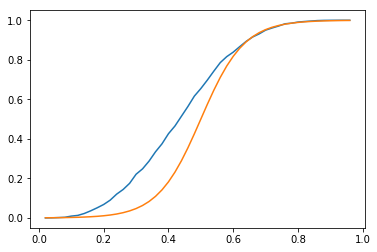

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

means = np.array(means)
stds = np.array(stds)

plt.plot(pr, means.T)
y = 1/(1+np.exp(-15*(pr-0.5)))
plt.plot(pr,y)
pass